# K-MEANS CLUSTERING (final)

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [19]:
pp_train = pd.read_csv("pp_train.csv")
pp_train.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,...,countryOfOrigin_EU,countryOfOrigin_OC,countryOfOrigin_SA,countryOfOrigin_UNK,fill_runtimeMinutes_Bruno,totalNominations,totalMedia,runtimeMinutes_notitletype,outlier_no_type,outlier_w_type
0,Neogenic Nightmare Chapter 3: Hydro-Man,8,1995,1995.0,NaN,0.0,779,1,0,21,...,0,0,0,0,29.0,0.0,1,89.0,False,False
1,Idealnaya para,6,1992,1992.0,NaN,0.0,38,1,0,24,...,1,0,0,0,94.0,0.0,1,75.0,False,False
2,MasterChef Celebrity México,6,2021,NaN,NaN,0.0,15,22,0,56,...,0,0,0,0,30.0,0.0,22,60.0,False,False
3,Seutateueob,8,2020,2020.0,80.0,1.0,15718,347,2,47,...,0,0,0,0,80.0,2.0,349,80.0,False,True
4,Lightdance,9,1995,1995.0,34.0,0.0,14,1,0,0,...,0,0,0,0,34.0,0.0,1,34.0,True,False


In [20]:
pp_train.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'numRegions', 'userReviewsTotal', 'is_Documentary',
       'is_History', 'is_Adventure', 'is_Thriller', 'is_Game-Show',
       'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography', 'is_Musical',
       'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult', 'is_Reality-TV',
       'is_News', 'is_Action', 'is_Crime', 'is_Short', 'is_Fantasy',
       'is_Family', 'is_Mystery', 'is_Talk-Show', 'is_Drama', 'is_Sport',
       'is_War', 'is_Horror', 'is_Animation', 'is_from_Oceania',
       'is_from_North America', 'is_from_South America', 'is_from_Asia',
       'is_from_Africa', 'is_from_Europe', 'countryOfOrigin',
       'countryOfOrigin_freq_enc', 'countryOfOrigin_NA', 'countryOfOrigin_AF',
       'countryOfOrigin_AS', 'countryOfOrigin_EU',

In [21]:
pp_train = pp_train[pp_train["outlier_w_type"] != True]

In [22]:
numeric = pp_train[[
                    "numVotes",
                    "totalCredits",
                    #"numRegions",
                    "userReviewsTotal",
                    "fill_runtimeMinutes_Bruno",
                    #"totalNominations",
                    "criticReviewsTotal",
                    #"startYear",
                    #"totalMedia"
                    ]].copy()

# Log-trasformazione 
for col in [
            "numVotes", 
            "totalCredits", 
            #"numRegions", 
            "userReviewsTotal", 
            "criticReviewsTotal", 
            #"totalNominations",
            #"totalMedia"
            ]:
    numeric[col] = np.log1p(numeric[col])

# Normalizzazione con MinMaxScaler
scaler = MinMaxScaler()
numeric_scaled = scaler.fit_transform(numeric)

# Se vuoi ottenere un DataFrame con i nomi delle colonne originali:
numeric_scaled_df = pd.DataFrame(numeric_scaled, columns=numeric.columns)

numeric_final = numeric_scaled  # già pronto per KMeans

In [23]:
print(numeric_scaled_df.head())

   numVotes  totalCredits  userReviewsTotal  fill_runtimeMinutes_Bruno  \
0  0.412344      0.319846          0.000000                   0.127854   
1  0.158566      0.333074          0.080104                   0.424658   
2  0.083089      0.418356          0.000000                   0.132420   
3  0.077622      0.000000          0.080104                   0.150685   
4  0.235753      0.487320          0.000000                   0.200913   

   criticReviewsTotal  
0            0.113878  
1            0.000000  
2            0.000000  
3            0.000000  
4            0.000000  


In [24]:
sse_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(numeric_final) 
    sse_list.append(kmeans.inertia_)

In [25]:
sil_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(numeric_final) 
    sil_list.append(silhouette_score(numeric_final, kmeans.labels_))

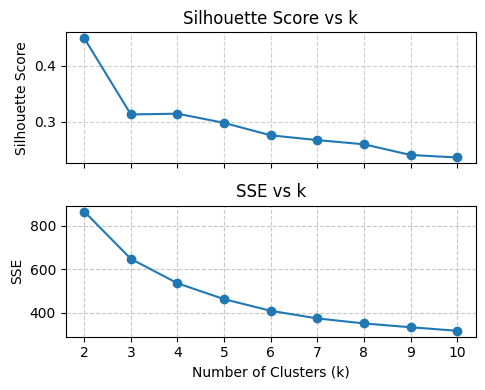

In [38]:
cluster_range = list(range(2, 11))

fig, axes = plt.subplots(2, 1, figsize=(5, 4), sharex=True)

# Plot Silhouette Scores
axes[0].plot(cluster_range, sil_list, marker='o', label='Silhouette Score')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Silhouette Score vs k')
axes[0].grid(True, linestyle='--', alpha=0.6)
# axes[0].legend()

# Plot SSE Scores
axes[1].plot(cluster_range, sse_list, marker='o', label='SSE')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('SSE')
axes[1].set_title('SSE vs k')
axes[1].grid(True, linestyle='--', alpha=0.7)
# axes[1].legend()

plt.tight_layout()
plt.show()
# plt.savefig('C:\\Users\\Gagia\\Desktop\\progetto DM\\report_data_semantics\\plots\\sse_silh_kmeans_set2.png')

In [27]:
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=100, random_state=94) 
clusters = kmeans.fit_predict(numeric_final)

In [28]:
total_points = len(clusters)
unique, counts = np.unique(clusters, return_counts=True)
percentages = counts / total_points * 100

# Print summary
print("\nCluster Distribution:")
print("-------------------")
for cluster, count, percentage in zip(unique, counts, percentages):
    print(f"Cluster {cluster}: {count} points ({percentage:.2f}%)")


Cluster Distribution:
-------------------
Cluster 0: 5778 points (38.64%)
Cluster 1: 2937 points (19.64%)
Cluster 2: 1559 points (10.42%)
Cluster 3: 4681 points (31.30%)


In [29]:
print('SSE', kmeans.inertia_)
print('Silhouette', silhouette_score(numeric_final, kmeans.labels_))

SSE 535.5114400299759
Silhouette 0.31450171671301275


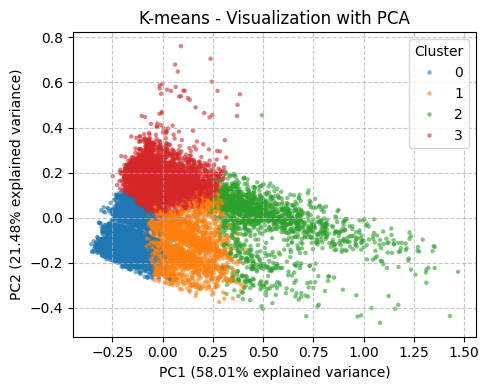

In [40]:
# PCA solo per visualizzazione
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_scaled)

# Percentuale di varianza spiegata
explained_var = pca.explained_variance_ratio_ * 100  # in percentuale

# DataFrame per il plot
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['cluster'] = clusters.astype(str)

# Plot 2D con palette default (deep)
plt.figure(figsize=(5, 4))
# sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', s=10, edgecolor='none')
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='cluster',
    hue_order=['0', '1', '2', '3'],  # Ordine desiderato
    s=10,
    alpha=0.6,
    edgecolor='none'
)

plt.title("K-means - Visualization with PCA", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel(f"PC1 ({explained_var[0]:.2f}% explained variance)", fontsize=10)
plt.ylabel(f"PC2 ({explained_var[1]:.2f}% explained variance)", fontsize=10)
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Cluster analysis and discussion

In [31]:
## COUNTRY OF ORIGIN CONTINENTI -> 
def discretize_continent_count(df, col_name, cont):
    new_col = f'{cont }_bin'
    
    def label(value):
        if value == 0:
            return f'0_not_{cont}'
       # elif value == 1:
        #    return f'one_{cont}'
        else:
            return f'1_is_{cont}'
    
    df[new_col] = df[col_name].apply(label)

# applico funzione
discretize_continent_count(pp_train, "countryOfOrigin_NA", "from_NorthAmerica")
discretize_continent_count(pp_train, "countryOfOrigin_EU", "from_Europe")
discretize_continent_count(pp_train, "countryOfOrigin_SA", "from_SouthAmerica")
discretize_continent_count(pp_train, "countryOfOrigin_AS", "from_Asia")
discretize_continent_count(pp_train, "countryOfOrigin_OC", "from_Oceania")
discretize_continent_count(pp_train, "countryOfOrigin_AF", "from_Africa")
discretize_continent_count(pp_train, "countryOfOrigin_UNK", "from_Unknown")

In [32]:
# Dizionario: colonna -> valore etichetta da cercare
continent_labels = {
    "from_NorthAmerica_bin": "1_is_from_NorthAmerica",
    "from_Europe_bin": "1_is_from_Europe",
    "from_SouthAmerica_bin": "1_is_from_SouthAmerica",
    "from_Asia_bin": "1_is_from_Asia",
    "from_Oceania_bin": "1_is_from_Oceania",
    "from_Africa_bin": "1_is_from_Africa",
    "from_Unknown_bin": "1_is_from_Unknown"
}

# Crea un DataFrame binario per i continenti
df_continent = pd.DataFrame()

for col, positive_label in continent_labels.items():
    continent_name = positive_label.replace("1_is_", "")
    df_continent[continent_name] = (pp_train[col] == positive_label).astype(int)

# Aggiungiamo la colonna cluster
df_continent['cluster'] = pp_train['cluster']

# Calcoliamo la frequenza assoluta dei record da ciascun continente per cluster
continent_counts = df_continent.groupby('cluster').sum()

# Plot a barre impilate (frequenze assolute)
continent_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(7, 6),
    colormap='tab20'
)
plt.ylabel("Frequenza assoluta")
plt.title("Frequenza dei continenti per cluster")
plt.xlabel("Cluster")
plt.legend(title="Continente", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


KeyError: 'cluster'